<a href="https://colab.research.google.com/github/Lital-Ben-Baruch/ScikitLearningSeries/blob/main/Logistic_regression_with_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic regression with Scikit-Learn: A Step-by-Step Guide
This notebook provides a comprehensive walkthrough on implementing Logistic Regression using the Scikit-Learn library. It's designed to offer hands-on experience for beginners and intermediates alike. The dataset used in this exercise can be accessed from the my GitHub repository. By the end of this tutorial, you will have a clear understanding of how to set up, train, and evaluate a Linear Regression model using Python and Scikit-Learn on Google Colab.


## Main steps outlined in this notebook:
### **First-Order Logistic Regression Model**
1. **Loading and visualizing the dataset**.
2. **Partitioning the dataset** into training and testing subsets.
3. **visualizing the datasets**.
4. **Constructing a Logistic Regression model** using sklearn.
5. **Sketching the decision boundary**.
6. **Assessing model performance** on both the training and testing sets using metrics like recall, precision, accuracy, and the F1 score. (Note: These metrics can indicate potential overfitting or underfitting).

### **second-Order Logistic Regression Model**
1. **Creating a Second-Order Data**.
2. **Partitioning the dataset** into training and testing subsets.
3. **Constructing a Logistic Regression model** using sklearn.
4. **Assessing model performance**


### **conclusion**

# First-Order Logistic Regression Model

## Step1. Loading and visualizing the dataset

### Import the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import precision_score,recall_score,f1_score

### Loading The Dataset

#### Import the dataset from drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Assign the dataset to a variable called df_tips


In [4]:
path = '/content/drive/My Drive/Summaries _ML_AI_CV/data_sets/Logistic_regression/ex2data1.txt'
df = pd.read_csv(path, names=['x1', 'x2', 'label'])
df.head()

,x1,x2,label
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [5]:
# ***** upload from local files ******
# path = '/content/ex2data1.txt'
# # We include column names in the CSV file since they are currently absent.
# df = pd.read_csv(path,names= ['x1','x2','label'])

# df.head()

Our objective is to construct a model that takes 'x1' and 'x2' as inputs and predicts the corresponding label 'y'.


```
X1 -->|           |
      |    MODEL  | --> y
X2 -->|           |

```



First, let's examine the number of observations in the dataset and assess its balance. Our objective is to ensure that X1 and X2 have a relatively equal number of observations.

In [6]:
df.shape[0] # number of observations

100



By using `df['label'].value_counts()`, we obtain the count of each unique value in the 'label' column of the DataFrame `df`. This function provides a summary of the distribution of labels in the dataset. It returns a Series object where the unique labels are the index and their respective counts are the values.

In this exercise we have a binary classification problem with labels '0' and '1', calling `df['label'].value_counts()` will provide the count of occurrences for each label.



In [7]:
df['label'].value_counts()

1    60
0    40
Name: label, dtype: int64

This indicates that there are 60 observations with label '1' and 40 observations with label '0' in the dataset. This information is useful for understanding the class distribution and determining if the dataset is balanced or imbalanced. In the case where X1 and X2 represent different classes or categories, comparing their respective counts can help identify any potential class imbalances in the dataset.

### visualizing The Dataset



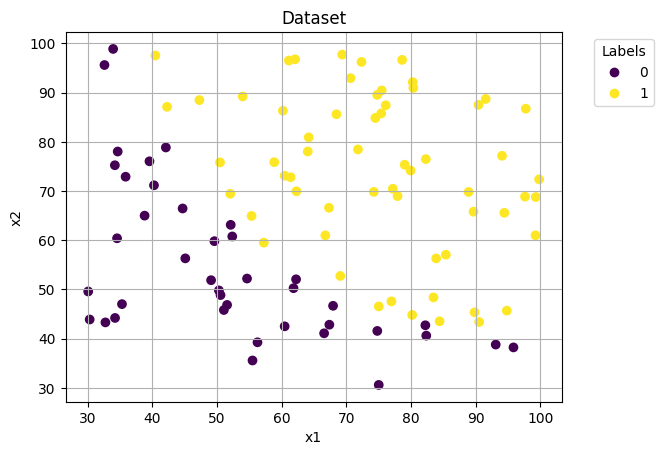

In [8]:
# Plot the data
plt.figure()
scatter = plt.scatter(df['x1'], df['x2'], c=df['label'])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Dataset')
# Add legend based on 'c' input
plt.legend(*scatter.legend_elements(), title='Labels', bbox_to_anchor=(1.2, 1.0))
plt.grid()
plt.show()

## Step2. Partitioning the dataset into training and testing subsets

For the train-test split, we will define a separate DataFrame for the input, called X, and another separate DataFrame for the output, called y.

`test_size=0.25`: This parameter determines the proportion of the dataset to include in the test split. In this case, 25% of the dataset is used for testing, and the remaining 75% is used for training.

`random_state=42`: This parameter is used for initializing the internal random number generator, which will decide the splitting of data into train and test indices. Setting a random_state ensures that the splits you generate are reproducible. Using an int value (like 42) will guarantee the same sequence of random numbers each time the function is called, leading to deterministic splits.

In [9]:
from sklearn.model_selection import train_test_split

X = df[['x1','x2']] # input DataFrame
y = df['label'] # output DataFrame

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Step3. visualizing the datasets

### Plot training data

The code `plt.scatter(X_train['x1'], X_train['x2'], c=y_train)` creates a scatter plot where the x-axis represents the values from the 'x1' feature of the training dataset (X_train), the y-axis represents the values from the 'x2' feature of the training dataset, and the color of each point is determined by the corresponding labels from the training target (y_train).

This scatter plot can be helpful for visualizing the relationship between the 'x1' and 'x2' features and how they relate to the labels. It can provide insights into patterns, clusters, or separability in the data.

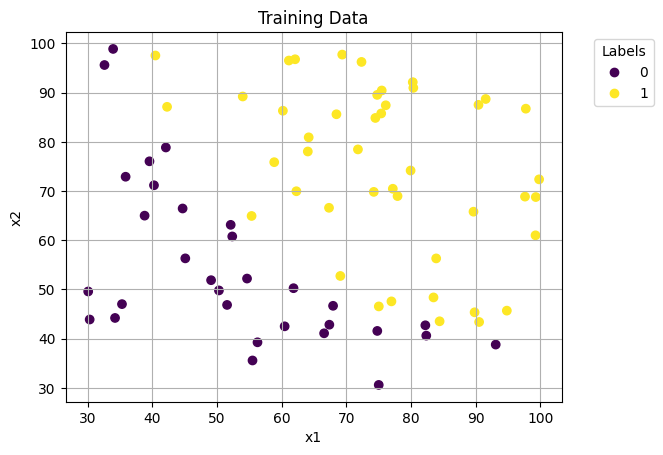

In [10]:
# Plot training data
plt.figure()
scatter = plt.scatter(X_train['x1'], X_train['x2'], c=y_train)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Training Data')
# Add legend based on 'c' input
plt.legend(*scatter.legend_elements(), title='Labels', bbox_to_anchor=(1.2, 1.0))
plt.grid()
plt.show()

Which model should we select? Of which order: 1, 2, 3, ...? Based on the scatter plot, the data appears to be separable by a linear line. This suggests that a model of dimensionality 1 (d=1) would be suitable for this dataset for now.

## Step4. Constructing a Logistic Regression model using sklearn
Based on what we observed from the scatter plot, we will define a linear regression model of the 1st order.

### Train

Define an instance of the model called logisticRegr.

In [11]:
from sklearn.linear_model import LogisticRegression

# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()

This is the training process for logistic regression using scikit-learn.

`X_train` contains two columns, `x1` and `x2`, which serve as the input features for the model. Meanwhile, `y_train` provides the true labels against which the model's predictions are compared.


In [12]:
logisticRegr.fit(X_train, y_train)

LogisticRegression()

The fit method carries out the gradient descent procedure to determine the optimal weights for the model.


## Step5. Sketching the decision boundary

### retrieve the model parameters


After training the model with model_instance.fit, you can retrieve the model The parameters are as follows:
* `b` - This represents θ₀, as we know it.
* `w1` and `w2` - These represent θ₁ and θ₂, respectively.


**explenation:**

The variable `b` represents the intercept term, often denoted as θ₀ (theta-zero) in the equation of logistic regression. It captures the offset or bias of the logistic regression model.

On the other hand, `w1` and `w2` correspond to the coefficients of the features 'x1' and 'x2' in the logistic regression model, respectively. These coefficients are typically represented as θ₁ (theta-one) and θ₂ (theta-two) in the logistic regression equation.

Therefore, by assigning `b` to θ₀, `w1` to θ₁, and `w2` to θ₂, we can relate these variables to the parameters of the logistic regression equation.

In [13]:
# Retrieve the model parameters.
b = logisticRegr.intercept_[0]
w1, w2 = logisticRegr.coef_.T

In [14]:
print(b)
print(w1)
print(w2)

-29.383019525075056
[0.24912332]
[0.21982524]


Now, we want to draw the decision boundary on the scatter plot we obtained for the training set.

The scatter plot for the training set, as previously obtained, is as follows:

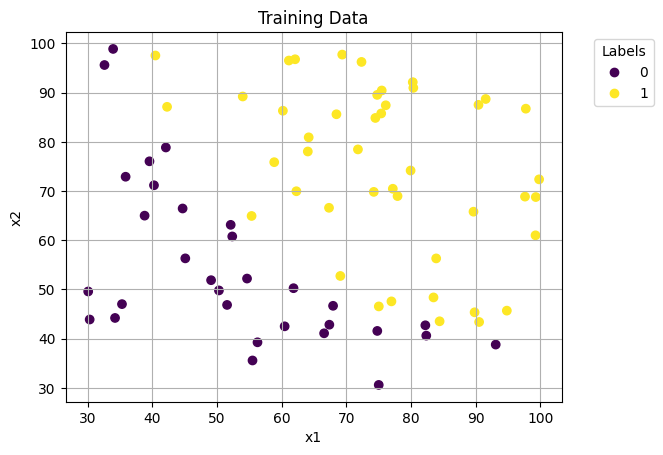

In [15]:
# Plot training data
plt.figure()
scatter = plt.scatter(X_train['x1'], X_train['x2'], c=y_train)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Training Data')
# Add legend based on 'c' input
plt.legend(*scatter.legend_elements(), title='Labels', bbox_to_anchor=(1.2, 1.0))
plt.grid()
plt.show()

The hypothesis function of logistic regression models the probability of a binary outcome based on a linear combination of the input features. The hypothesis is typically represented using the sigmoid or logistic function.

In mathematical notation, the hypothesis function hθ(x) for logistic regression can be defined as:

hθ(x) = 1 / (1 + exp(-θ^T * x))

where:

hθ(x) is the predicted probability of the positive class (y = 1) given the input features x.
θ is the vector of coefficients (parameters) of the logistic regression model.
θ^T denotes the transpose of θ.
x is the vector of input features.
The sigmoid function 1 / (1 + exp(-z)) transforms the linear combination θ^T * x into a value between 0 and 1, representing the probability of the positive class. If hθ(x) is greater than or equal to 0.5, we predict the positive class (y = 1); otherwise, we predict the negative class (y = 0).

The goal of logistic regression is to find the optimal values for θ that maximize the likelihood of the observed data, allowing the model to make accurate predictions on new, unseen examples.


```
x = np.arange(25,100)
```

Based on the scatter plot of the training set, we observe that the range of values for the input feature x spans from 25 to 100. To represent this range in code, we can use np.arange(25, 100).

set. therfore we set it as follow np.arange(25,100).




```
y = (-b-w1*x)/w2
```

In our problem with two inputs, we can represent the hypothesis function of logistic regression as:

θ = θ₀ + θ₁ * x₁ + θ₂ * x₂.

In this equation:
- b represents θ₀,
- θ₁ represents w₁,
- θ₂ represents w₂.

To determine the decision boundary where hθ(x) = 0.5, we set the equation θ = 0.

Thus, we have:
b + w₁ * x₁ + w₂ * x₂ = 0.

Simplifying further, we isolate x₂ on one side:
x₂ = -(b + w₁ * x₁) / w₂.

This equation provides the relationship between the input features x₁, x₂, and the decision boundary in terms of the model coefficients (b, w₁, w₂). By plugging in specific values for b, w₁, and w₂, we can compute the corresponding values of x₂ that lie on the decision boundary.

### plot the training set with the model and corrosponding DB

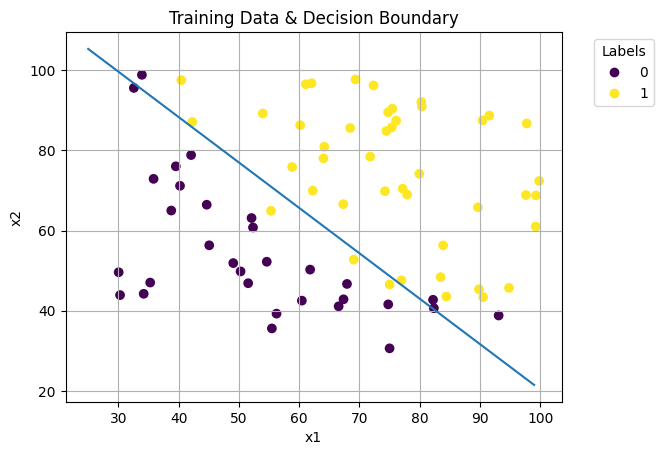

In [16]:
# calculate DB values
x = np.arange(25,100)
y = (-b-w1*x)/w2

# create figure
plt.figure()

# plot the data
scatter = plt.scatter(X_train['x1'],X_train['x2'],c = y_train)
plt.xlabel('x1')
plt.ylabel('x2')

# plot the decesion boundry
plt.plot(x,y)

plt.title('Training Data & Decision Boundary')
# Add legend based on 'c' input
plt.legend(*scatter.legend_elements(), title='Labels', bbox_to_anchor=(1.2, 1.0))
# add grid and legend
plt.grid()

We can visualize a decision boundary only when we have a maximum of two features (x1, x2); otherwise, visualization isn't feasible.

From the scatter plot, we can observe a seemingly appropriate decision boundary. Why does it appear suitable? If our decision boundary for the training set didn't offer a good separation between the labels, we might need additional iterations. However, overfitting won't be evident from this decision boundary since it's based on the training set; overfitting becomes apparent when evaluating against the test set.

## Step6. Assessing model performance

### Train Set

Import the necessary libraries for model evaluation

In [17]:
from sklearn.metrics import precision_score,recall_score,f1_score,confusion_matrix

predict train set samples

In [20]:
# predict train data
y_pred_train = logisticRegr.predict(X_train)

confusion matrix using sklearn and pandas

In [21]:
# create CM using sklearn and pandas
cm = confusion_matrix(y_train, y_pred_train)

# construct results in df
cm_df = pd.DataFrame(cm)
print(cm_df.head())

    0   1
0  27   4
1   3  41


calculate precision recall and f1 score

In [22]:
print("\t||| training |||")
print("--------------------------------")
print("precision:")
print(precision_score(y_train, y_pred_train, average=None)) #average=None; calculated separately for each class
print("--------------------------------")
print("recall:")
print(recall_score(y_train, y_pred_train, average=None))
print("--------------------------------")
print("f1 score:")
print(f1_score(y_train, y_pred_train, average=None))
print("--------------------------------")

	||| training |||
--------------------------------
precision:
[0.9        0.91111111]
--------------------------------
recall:
[0.87096774 0.93181818]
--------------------------------
f1 score:
[0.8852459  0.92134831]
--------------------------------



The **average=None** parameter in the recall_score() function is used to specify that the recall score should be calculated separately for each class in a multi-class classification problem.

Once we have obtained the F1 score, precision, and recall estimates for the training set, our next step is to calculate these metrics for the test set. By comparing the estimation values between the training and test sets, we can determine if we are experiencing bias, underfitting, or overfitting.

In this case, since we obtained a precision score of 0.9 (or 90%) for the first class ('0') and a precision score of 0.91111111 (or approximately 91.11%) for the second class ('1') during training, it suggests that bias is unlikely. However, we should be cautious about the potential for overfitting, as the model may be too specialized to the training data and could struggle to generalize to new, unseen data in the test set.

### Test Set

plot the test set with the model and corrosponding decision boundary

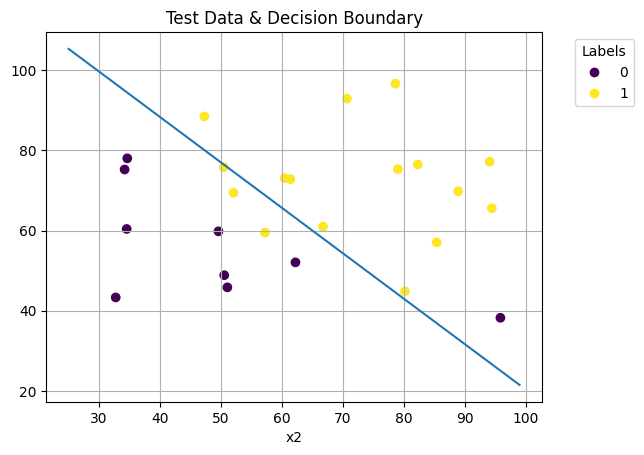

In [23]:
# calculate DB values
x = np.arange(25,100)
y = (-b-w1*x)/w2

# create figure
plt.figure()

# plot the daata
scatter = plt.scatter(X_test['x1'],X_test['x2'],c = y_test)
plt.xlabel('x1')
plt.xlabel('x2')

# plot the decesion boundry
plt.plot(x,y)

plt.title('Test Data & Decision Boundary')
# Add legend based on 'c' input
plt.legend(*scatter.legend_elements(), title='Labels', bbox_to_anchor=(1.2, 1.0))
# add grid and legend
plt.grid()

The provided code generates a plot that displays the test set data points, with different colors assigned based on their class labels. Additionally, it plots the decision boundary line determined by the model. This visualization helps assess how effectively the model separates the classes in the test set.

By examining the plot, we can observe certain data points that the model misclassified. Specifically, there are yellow dots located below the decision boundary line and a purple dot located above the line. However, it is important to note that these misclassified points are new data points not seen during training. Despite these misclassifications, the overall predictions appear accurate, as the majority of the data points are correctly classified and align well with the decision boundary.

In summary, the plot allows for a visual understanding of the model's performance on the test set. While some misclassifications are present for unseen data, the model's predictions appear to be generally reliable and effective in separating the classes.

predict test set samples

In [24]:
# predict test data
y_pred_test = logisticRegr.predict(X_test)

confusion matrix using sklearn and pandas

In [26]:
# create CM using sklearn and pandas
cm = confusion_matrix(y_test, y_pred_test)

# construct results in df
cm_df = pd.DataFrame(cm)
print(cm_df.head())

   0   1
0  8   1
1  3  13


calculate precision recall and f1 score

In [27]:
print("\t||| testing |||")
print("--------------------------------")
print("precision:")
print(precision_score(y_test, y_pred_test, average=None))
print("--------------------------------")
print("recall:")
print(recall_score(y_test, y_pred_test, average=None))
print("--------------------------------")
print("f1 score:")
print(f1_score(y_test, y_pred_test, average=None))
print("--------------------------------")


	||| testing |||
--------------------------------
precision:
[0.72727273 0.92857143]
--------------------------------
recall:
[0.88888889 0.8125    ]
--------------------------------
f1 score:
[0.8        0.86666667]
--------------------------------


**In class 0**, we achieved a **precision of 90%** in the **training** set. However, in the **test** set, the precision **dropped to 72%**, indicating a performance decline of 18%. This suggests a **slight overfitting issue**, as the model may have become too specialized to the training data. On the other hand, in **class 1**, both the **training and test** sets had a precision of 92%, indicating **consistent performance**.

The F1 score evaluates the model's predictions across all classes in a classification task. It is commonly used to assess the **balance between precision and recall.** For class 0, the **training** set had an F1 score of **88%**, while the **test** set had an F1 score of 80% (an 8% decline). For **class 1**, the **training** and test sets had F1 scores of 92% and 86% respectively (a 8% decline). Overall, the logistic regression model performs reasonably well, although there is a **slight decrease in performance**.

Considering these results, we have two options: either we can choose to continue using the logistic regression model of the first order (d=1) or explore the possibility of building a more sophisticated model, such as a second-order model.

# second-Order Logistic Regression Model

## Creating a Second-Order Data

Define new columns with 'new' data for a second-order Logistic Regression Model.

In [28]:
df['x1_2'] = np.power(df['x1'],2)
df['x2_2'] = np.power(df['x2'],2)

These lines create two new columns in the DataFrame df named 'x1_2' and 'x2_2'. These columns contain the squared values of the original features 'x1' and 'x2', respectively. The np.power() function from the NumPy library is used to perform the element-wise squaring operation.

## Step2. Partitioning the dataset into training and testing subsets

Reorganizing the DataFrame

In [43]:
# df[['x1', 'x2', 'x1_2', 'x2_2', 'label']].head()
# for it to be permanent
df = df.reindex(columns=['x1', 'x2', 'x1_2', 'x2_2', 'label'])
df.head()

,x1,x2,x1_2,x2_2,label
0,34.623660,78.024693,1198.797806,6087.852689,0
1,30.286711,43.894998,917.284849,1926.770808,0
2,35.847409,72.902198,1285.036716,5314.730477,0
3,60.182599,86.308552,3621.945269,7449.166165,1
4,79.032736,75.344376,6246.173368,5676.775061,1


For the train-test split, we will define a separate DataFrame for the input, called X, and another separate DataFrame for the output, called y.

In [36]:
X = df[['x1','x2','x1_2','x2_2']] # input DataFrame
y = df['label'] # output DataFrame

These lines assign the feature matrix X and the target variable y for the model. The feature matrix X is created by selecting the columns 'x1', 'x2', 'x1_2', and 'x2_2' from the DataFrame df. These columns represent the original features 'x1' and 'x2', as well as their squared counterparts 'x1_2' and 'x2_2'. The target variable y is assigned the values from the 'label' column of the DataFrame, which represents the class labels.

By including the squared terms 'x1_2' and 'x2_2' as additional features in the feature matrix X, the code enables the creation of a second-degree polynomial model. This model can capture nonlinear relationships between the original features and the target variable, potentially improving the model's predictive performance compared to a linear model.

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)



`test_size=0.25`: This parameter determines the proportion of the dataset to include in the test split. In this case, 25% of the dataset is used for testing, and the remaining 75% is used for training.

`random_state=42`: This parameter is used for initializing the internal random number generator, which will decide the splitting of data into train and test indices. Setting a random_state ensures that the splits you generate are reproducible. Using an int value (like 42) will guarantee the same sequence of random numbers each time the function is called, leading to deterministic splits.

## Step 3. Constructing a Logistic Regression model

### Train

Define a **new** instance of the model called logisticRegr_pow.

In [45]:
# all parameters not specified are set to their defaults
logisticRegr_pow = LogisticRegression()

This is the training process for logistic regression using scikit-learn.

`X_train` contains 4 columns, `x1`, `x2`,`x1_2`, `x2_2` which serve as the input features for the model. Meanwhile, `y_train` provides the true labels against which the model's predictions are compared.


In [47]:
logisticRegr_pow.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

The fit method carries out the gradient descent procedure to determine the optimal weights for the model.


## Step4. Assessing model performance

In [48]:
print(logisticRegr_pow.intercept_)
print(logisticRegr_pow.coef_)

# question to studets : how to plot DB in such complicated case?

[-118.92861121]
[[ 1.57471479  1.18541571 -0.00783047 -0.00462033]]


When we print `logisticRegr.intercept_`, we see the value of the intercept term (θ₀ = -118.92861121) in the logistic regression model. This term indicates the value of the decision boundary when all input features are set to zero. Furthermore, by printing `logisticRegr.coef_`, we observe an array of coefficients tied to each input feature in the model. These coefficients highlight the influence or significance of each feature in determining the outcome. In particular, the coefficients are: θ₁ = 1.57471479, θ₂ = 1.18541571, θ₃ = -0.00783047, and θ₄ = -0.00462033. Each coefficient corresponds to a distinct input feature and plays a role in the overall prediction.

Moreover, it's evident that the coefficients θ₃ and θ₄, which are multiplied by x1_2 and x2_2 respectively, are much lower. This suggests that these features have a minimal impact on the model's prediction. This observation aligns with our initial assessment from plotting the dataset, where we anticipated the model would be close to linear.

### Train Set

predict train set samples

In [50]:
# predict train data
y_pred_train = logisticRegr_pow.predict(X_train)

confusion matrix using sklearn and pandas

In [53]:
cm = confusion_matrix(y_train, y_pred_train)

# construct results in df
cm_df = pd.DataFrame(cm)
print(cm_df.head())

    0   1
0  31   0
1   0  44


calculate precision recall and f1 score

In [54]:
print("\t||| training |||")
print("--------------------------------")
print("precision:")
print(precision_score(y_train, y_pred_train, average=None))
print("--------------------------------")
print("recall:")
print(recall_score(y_train, y_pred_train, average=None))
print("--------------------------------")
print("f1 score:")
print(f1_score(y_train, y_pred_train, average=None))
print("--------------------------------")


	||| training |||
--------------------------------
precision:
[1. 1.]
--------------------------------
recall:
[1. 1.]
--------------------------------
f1 score:
[1. 1.]
--------------------------------


From the output for the training set, we can observe that we achieved perfect detection, meaning our model made no erroneous predictions.

### Test Set

predict train data

In [55]:
y_pred_test = logisticRegr_pow.predict(X_test)

confusion matrix using sklearn and pandas

In [56]:
# create CM using sklearn and pandas
cm = confusion_matrix(y_test, y_pred_test)

# construct results in df
cm_df = pd.DataFrame(cm)
print(cm_df.head())

   0   1
0  9   0
1  1  15


calculate precision recall and f1 score

In [57]:
print("\t||| training |||")
print("--------------------------------")
print("precision:")
print(precision_score(y_test, y_pred_test, average=None))
print("--------------------------------")
print("recall:")
print(recall_score(y_test, y_pred_test, average=None))
print("--------------------------------")
print("f1 score:")
print(f1_score(y_test, y_pred_test, average=None))
print("--------------------------------")


	||| training |||
--------------------------------
precision:
[0.9 1. ]
--------------------------------
recall:
[1.     0.9375]
--------------------------------
f1 score:
[0.94736842 0.96774194]
--------------------------------


# conclusion

The test results for the second-degree model are promising. When compared to the first-degree model, we see a marked improvement.

For the first-degree model, the results were:
**Training Set:**
- Precision: [0.9, 0.91111111]
- Recall: [0.87096774, 0.93181818]
- F1 Score: [0.8852459, 0.92134831]

**Testing Set:**
- Precision: [0.72727273, 0.92857143]
- Recall: [0.88888889, 0.8125]
- F1 Score: [0.8, 0.86666667]

For the second-degree model, the results improved to:
**Training Set:**
- Precision: [1.0, 1.0]
- Recall: [1.0, 1.0]
- F1 Score: [1.0, 1.0]

**Testing Set:**
- Precision: [0.9, 1.0]
- Recall: [1.0, 0.9375]
- F1 Score: [0.94736842, 0.96774194]

Clearly, the second-degree model outperforms the first-degree one, particularly in the training phase.